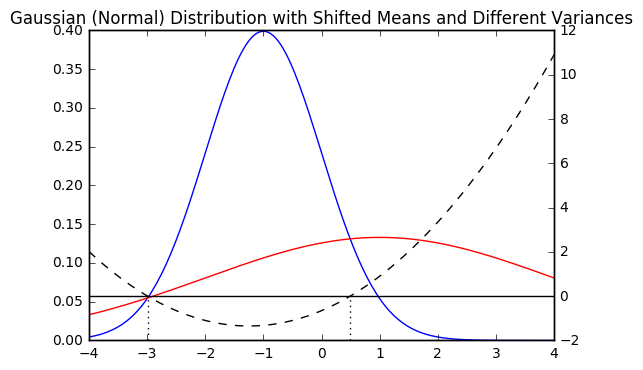

Here, we have considered the Threshold as zero


In [19]:
# Generating Gaussian (Normal) distributions with shifted means and different variances

#Importing necessary functions from the available libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
from scipy.optimize import fsolve

fig, ax1 = plt.subplots()
#Assigning values to mean, variance and random variable for the two different normal distributions
mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0), color='b') #Plotting the Gaussian distribution for the specified means and variance

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),color='r') #Plotting the Gaussian distribution for the specified means and variance

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--') #Plotting the Log-Likelihood Ratio Curve for the given distributions

#Assigning the threshold (could be varied; Here, we have taken just one value of threshold for better understanding)
y = 0

#Finding the decision regions 
f = lambda x : np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0))
x = np.array([-4.0, 4.0])
ans = fsolve(f,x)

#print(ans[0])
#print(ans[1])

plt.plot((ans[0], ans[0]), (-2, y), 'k:')
plt.plot((ans[1], ans[1]), (-2, y), 'k:')
plt.plot((-4, 4), (y, y), 'k-')

plt.title('Gaussian (Normal) Distribution with Shifted Means and Different Variances')
plt.show()

print('Here, we have considered the Threshold as zero')

C:\Users\HP\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\Users\HP\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


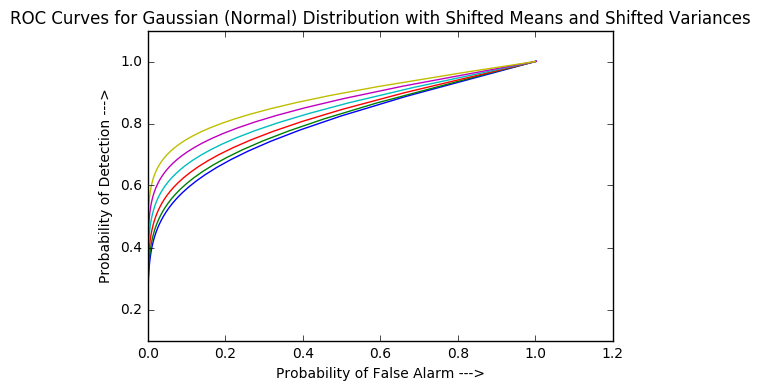

In [18]:
# Generating Receiver Operating Characteristic (ROC) curves for Gaussian distributions with shifted means and different variances

#Importing necessary functions from the available libraries
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math
from scipy.stats import norm
from scipy.optimize import fsolve

fig, ax1 = plt.subplots()

#Assigning values to random variable, mean and threshold
x = np.linspace(-10, 10, 400)
mu = np.linspace(0.25, 1.5, 6)
yloop = np.linspace(-2, 10, 100) #Assigning a set of possible values for threshold

#Plotting the ROC curves for Gaussian distributions with the different values of mean and variance
for index in range(6):
    ans_0 = []
    ans_1 = []
    FalseAlarm = []
    ProbDet = []
    mu0 = -mu[index]
    mu1 = mu[index]
    
    for index_1 in range(100):
        y = yloop[index_1]
        
        f = lambda x:np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)) - y
        ans_0.append(fsolve(f, -4))
        ans_1.append(fsolve(f, 4))
        
    ProbDet = 1 - (norm.cdf((ans_1 - mu0)/sigma0) - norm.cdf((ans_0 - mu0)/sigma0))
    FalseAlarm = 1 - (norm.cdf((ans_1 - mu1)/sigma1) - norm.cdf((ans_0 - mu1)/sigma1))
    ax1.plot(ProbDet, FalseAlarm)


plt.xlabel('Probability of False Alarm --->')
plt.ylabel('Probability of Detection --->')
plt.title('ROC Curves for Gaussian (Normal) Distribution with Shifted Means and Shifted Variances')
plt.show()